In [193]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [194]:
cust_data =  pd.read_csv("ds_chall.csv")

In [195]:
cust_data=cust_data.drop_duplicates(subset="cc_num")
cust_data

,cc_num,job,age,gender,date,HOM_total,HOM_total_freq,HOM_entertainment,HOM_entertainment_freq,HOM_food_dining,...,HOM_misc_pos,HOM_misc_pos_freq,HOM_personal_care,HOM_personal_care_freq,HOM_shopping_net,HOM_shopping_net_freq,HOM_shopping_pos,HOM_shopping_pos_freq,HOM_travel,HOM_travel_freq
0,4383521454815,Academic librarian,33,1,2019-01-15,884.03,22,0.00,0,0.00,...,40.29,2,35.40,2,3.75,2,16.09,2,33.42,2
47,6011975266774121,"Accountant, chartered certified",77,0,2019-01-15,284.91,9,78.29,2,14.85,...,0.00,0,51.33,2,0.00,0,14.12,2,0.00,0
94,370348764075623,"Accountant, chartered public finance",69,1,2019-01-15,1853.82,26,741.45,4,309.01,...,46.70,2,71.50,3,0.00,0,27.36,1,3.64,1
141,213191402330021,"Accountant, chartered public finance",16,1,2019-01-15,1710.26,28,154.67,3,39.16,...,13.78,2,107.72,1,18.99,4,685.17,3,0.00,0
188,2260801330657968,Accounting technician,94,0,2019-01-15,329.73,6,0.00,0,34.72,...,0.00,0,0.00,0,51.04,1,0.00,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42441,375848982312810,Web designer,77,1,2019-01-15,2236.70,40,482.85,4,99.45,...,0.00,0,69.33,2,56.13,6,8.87,2,0.00,0
42488,343819048608995,Wellsite geologist,64,0,2019-01-15,967.36,21,12.53,1,87.13,...,13.19,2,78.88,2,6.80,1,2.04,1,5.42,1
42535,4220495028289516646,Wellsite geologist,54,0,2019-01-15,892.56,20,156.36,3,178.72,...,62.54,3,0.00,0,0.00,0,30.06,5,4.47,1
42582,30373802285317,Wellsite geologist,64,1,2019-01-15,993.14,12,248.75,1,70.16,...,440.58,2,89.83,2,0.00,0,12.68,2,2.58,1


In [196]:
features=["age","HOM_total","HOM_total_freq","HOM_entertainment","HOM_entertainment_freq"]

In [197]:
cust_data = cust_data.dropna(subset=features)

In [198]:
data = cust_data[features].copy()
data

,age,HOM_total,HOM_total_freq,HOM_entertainment,HOM_entertainment_freq
0,33,884.03,22,0.00,0
47,77,284.91,9,78.29,2
94,69,1853.82,26,741.45,4
141,16,1710.26,28,154.67,3
188,94,329.73,6,0.00,0
...,...,...,...,...,...
42441,77,2236.70,40,482.85,4
42488,64,967.36,21,12.53,1
42535,54,892.56,20,156.36,3
42582,64,993.14,12,248.75,1


In [199]:
data = ((data -data.min()) / (data.max() - data.min()))*9+1 #data scaling

In [200]:
data.describe()

,age,HOM_total,HOM_total_freq,HOM_entertainment,HOM_entertainment_freq
count,908.000000,908.000000,908.000000,908.000000,908.000000
mean,4.802863,2.271854,3.650869,1.894522,2.189427
std,1.996672,0.962361,1.662918,1.099270,1.021659
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.111111,1.580101,2.227273,1.070021,1.562500
50%,4.666667,2.080595,3.454545,1.513224,2.125000
75%,6.111111,2.700766,4.784091,2.353912,2.687500
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [201]:
def random_centroids(data,k): #initialized random k centroids
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [202]:
centroids = random_centroids(data,5)
centroids

,0,1,2,3,4
age,4.888889,4.00000,6.111111,6.111111,5.111111
HOM_total,1.388687,1.14363,2.823132,2.526239,1.847202
HOM_total_freq,1.409091,1.00000,3.556818,4.681818,2.636364
HOM_entertainment,1.181832,1.00000,1.291296,1.486559,1.055547
HOM_entertainment_freq,2.687500,1.56250,1.000000,1.000000,1.000000


In [203]:
def get_labels(data,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis = 1))) #distance of each cluster to the cluster
    return distances.idxmin(axis=1)#finds index of the minimum value of each row

In [204]:
labels = get_labels(data, centroids)
labels.value_counts() #checks the assignment of clusters

3    309
4    247
2    131
1    121
0    100
dtype: int64

In [205]:
def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
     #calculates new centers of each column and looks for each geometric mean of each feature

In [206]:
def plot_clusters(data,labels,centroids,iteration):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T) #transforms into 2d data
    clear_output(wait =True)
    plt.title(f'Iteration {iteration}')#plots the cluster
    plt.scatter(x=data_2d[:,0], y = data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y =centroids_2d[:,1])
    plt.figure(figsize=(16,8))
    plt.show()


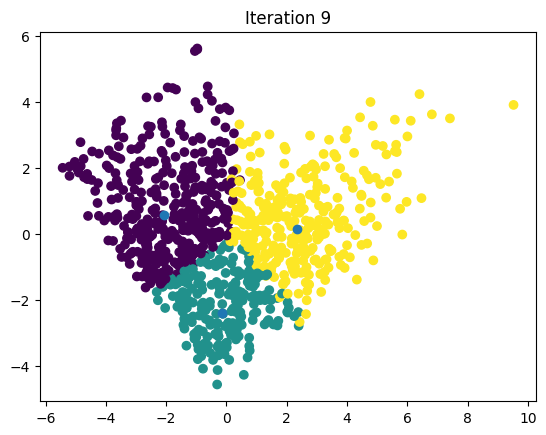

<Figure size 1600x800 with 0 Axes>

In [207]:
max_iterations = 10
k = 3

centroids = random_centroids(data,k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids): #stops the loop if max itereations are hit or if centroid is equal to old cent
    old_centroids = centroids

    labels = get_labels(data,centroids)
    centroids = new_centroids(data,labels,k)
    plot_clusters(data,labels,centroids,iteration)
    iteration += 1

In [208]:
centroids

,0,1,2
age,6.549833,3.044927,3.430016
HOM_total,1.791419,1.692020,3.023130
HOM_total_freq,2.706546,2.351283,5.268678
HOM_entertainment,1.395747,1.406198,2.387727
HOM_entertainment_freq,1.717337,1.548930,2.796626


In [209]:
cust_data[labels== 2][["job"]+features]

,job,age,HOM_total,HOM_total_freq,HOM_entertainment,HOM_entertainment_freq
282,Accounting technician,53,2521.72,55,161.81,5
329,Accounting technician,42,4298.82,47,379.78,5
423,Administrator,66,3066.50,46,172.20,4
611,"Administrator, charities/voluntary organisations",35,3494.40,32,89.88,1
658,"Administrator, education",34,2214.84,29,292.85,4
...,...,...,...,...,...,...
41830,Video editor,49,2181.20,40,183.39,2
42018,Volunteer coordinator,40,3908.42,47,221.40,3
42065,Warden/ranger,37,1587.65,46,16.64,2
42253,Water engineer,48,4407.97,72,58.64,1


In [210]:
from sklearn.cluster import KMeans

In [211]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [212]:
centroids = kmeans.cluster_centers_

In [213]:
pd.DataFrame(centroids, columns = features).T

,0,1,2
age,6.934268,3.583161,3.549846
HOM_total,1.928588,1.830389,3.285527
HOM_total_freq,3.044840,2.710368,5.645526
HOM_entertainment,1.554166,1.524877,2.812959
HOM_entertainment_freq,1.942568,1.724961,3.105484
